In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_excel('./data/dataset.xlsx')

In [3]:
display(df.head())
display(df.shape)
df.info(verbose=True)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

(5644, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   Patient ID                                             object 
 1   Patient age quantile                                   int64  
 2   SARS-Cov-2 exam result                                 object 
 3   Patient addmited to regular ward (1=yes, 0=no)         int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  int64  
 6   Hematocrit                                             float64
 7   Hemoglobin                                             float64
 8   Platelets                                              float64
 9   Mean platelet volume                                   float64
 10  Red blood Cells                                        float64
 11  Lym

In [4]:
label_col = 'SARS-Cov-2 exam result'

drop_cols = ['Patient ID']

categorical_cols = ['Patient addmited to regular ward (1=yes, 0=no)', 
                    'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)', 
                    'Respiratory Syncytial Virus', 'Influenza A','Influenza B','Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Mycoplasma pneumoniae',
                    'Coronavirus HKU1','Parainfluenza 3','Chlamydophila pneumoniae','Adenovirus','Parainfluenza 4',
                    'Coronavirus229E','CoronavirusOC43','Inf A H1N1 2009','Bordetella pertussis','Metapneumovirus',
                    'Parainfluenza 2','Influenza B, rapid test','Influenza A, rapid test', 'Strepto A', 
                    'Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 
                    'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 
                    'Urine - Density', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar', 
                    'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Red blood cells', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']

In [5]:
df[label_col] = df.apply(lambda row: 1 if row[label_col] == 'positive' else 0, axis=1)

In [6]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d

In [7]:
df[categorical_cols]  = df[categorical_cols].replace(np.nan, 'missing_values')
display(df.head())

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,missing_values,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_valu

In [8]:
vocabulary = {cat: df[cat].unique().tolist() for cat in categorical_cols}

vocabulary_list = list(vocabulary.values())

print(vocabulary_list)

[[0, 1], [0, 1], [0, 1], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'detected', 'not_detected'], ['missing_values'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected', 'detected'], ['missing_values', 'not_detected'], ['missing_values', 'negative', 'positive'], ['missing_values', 'negative', 'positive'], ['missing_values', 'positive', 'negative', 'not_done'], ['missi

In [9]:
label = df[[label_col]]

display(label)

,SARS-Cov-2 exam result
0,0
1,0
2,0
3,0
4,0
...,...
5639,1
5640,0
5641,0
5642,0


In [10]:
drop_cols.append(label_col)
data = df.drop(drop_cols, axis=1)
display(data.head())
display(data.shape)

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,missing_values,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing_values,missing

(5644, 109)

In [11]:
preprocessor = ColumnTransformer(
        [("cat", OneHotEncoder(categories=vocabulary_list, drop='first', sparse=False), categorical_cols)], remainder='passthrough')


In [12]:
preprocessor.fit_transform(data)

array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [13]:
estimator = XGBClassifier(objective='binary:logistic', eval_metric='auc', verbose=True)

In [14]:
pipeline = Pipeline(steps=[('transformer', preprocessor),
                      ('classifier', estimator)], verbose=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)

In [16]:
pipeline.fit(X_train, y_train, classifier__eval_metric='auc', classifier__verbose=True, classifier__eval_set=[(preprocessor.fit_transform(X_train), y_train)])

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.1s
[0]	validation_0-auc:0.630575
[1]	validation_0-auc:0.63252
[2]	validation_0-auc:0.631295
[3]	validation_0-auc:0.634763
[4]	validation_0-auc:0.635082
[5]	validation_0-auc:0.636459
[6]	validation_0-auc:0.636427


D:\Users\ue0094\.conda\envs\py36env\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ue0094\.conda\envs\py36env\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.65291
[8]	validation_0-auc:0.665553
[9]	validation_0-auc:0.665461
[10]	validation_0-auc:0.667033
[11]	validation_0-auc:0.669189
[12]	validation_0-auc:0.670073
[13]	validation_0-auc:0.668726
[14]	validation_0-auc:0.667563
[15]	validation_0-auc:0.668327
[16]	validation_0-auc:0.675123
[17]	validation_0-auc:0.674658
[18]	validation_0-auc:0.675951
[19]	validation_0-auc:0.674875
[20]	validation_0-auc:0.675221
[21]	validation_0-auc:0.676185
[22]	validation_0-auc:0.675723
[23]	validation_0-auc:0.70253
[24]	validation_0-auc:0.705188
[25]	validation_0-auc:0.704454
[26]	validation_0-auc:0.705774
[27]	validation_0-auc:0.705682
[28]	validation_0-auc:0.705796
[29]	validation_0-auc:0.705634
[30]	validation_0-auc:0.705596
[31]	validation_0-auc:0.705383
[32]	validation_0-auc:0.706576
[33]	validation_0-auc:0.709926
[34]	validation_0-auc:0.709922
[35]	validation_0-auc:0.710824
[36]	validation_0-auc:0.711907
[37]	validation_0-auc:0.711964
[38]	validation_0-auc:0.711912
[39]	validati

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories=[[0,
                                                                             1],
                                                                            [0,
                                                                             1],
                                                                            [0,
                                                                             1],
                                                                            ['missing_values',
                                                                             'not_detected',
                           

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

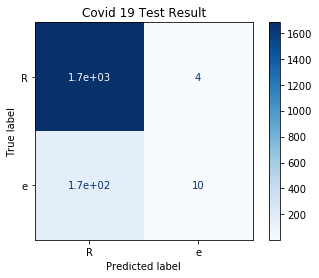

In [21]:
disp = plot_confusion_matrix(pipeline, X_test, y_test,
                                 display_labels='Returls',
                                 cmap=plt.cm.Blues)

disp.ax_.set_title('Covid 19 Test Result')


plt.show()

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, f1_score, auc, classification_report, precision_recall_curve

def plot_roc_curve(training_labels, test_labels, training_pred_probs, test_pred_probs, title_prefix):
    
    train_fpr, train_tpr, train_thresholds = roc_curve(training_labels, training_pred_probs)
    test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, test_pred_probs)

    train_roc_auc = auc(train_fpr, train_tpr)

    test_roc_auc = auc(train_fpr, train_tpr)
    figure = plt.figure()

    figure.set_figheight(5)
    figure.set_figwidth(12)

    figure.add_subplot(1,2, 1)

    plt.plot(train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % (train_roc_auc), color='r')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title_prefix + ' Train Receiver operating characteristic')
    plt.legend(loc="upper left")

    # create the axis of thresholds (scores)
    ax1 = plt.gca().twinx()
    ax1.plot(train_fpr, train_thresholds, markeredgecolor='r',linestyle='-.', color='b')
    ax1.set_ylabel('Train Threshold',color='b')
    ax1.set_ylim([train_thresholds[-1],train_thresholds[0]])
    ax1.set_xlim([train_fpr[0],train_fpr[-1]])


    figure.add_subplot(1,2, 2)

    plt.plot(test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % (test_roc_auc), color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title_prefix + ' Test Receiver operating characteristic')
    plt.legend(loc="upper left")

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(test_fpr, test_thresholds, markeredgecolor='r',linestyle='-.', color='b')
    ax2.set_ylabel('Test Threshold',color='b')
    ax2.set_ylim([test_thresholds[-1],test_thresholds[0]])
    ax2.set_xlim([test_fpr[0],test_fpr[-1]])

    figure.tight_layout()

In [58]:
training_pred_probs = pipeline.predict_proba(X_train)
print(training_pred_probs)
test_pred_probs = pipeline.predict_proba(X_test)
print(test_pred_probs)

[[0.89 0.11]
 [0.86 0.14]
 [0.9  0.1 ]
 ...
 [0.08 0.92]
 [0.86 0.14]
 [0.96 0.04]]
[[0.9  0.1 ]
 [0.89 0.11]
 [0.86 0.14]
 ...
 [0.86 0.14]
 [0.89 0.11]
 [0.87 0.13]]


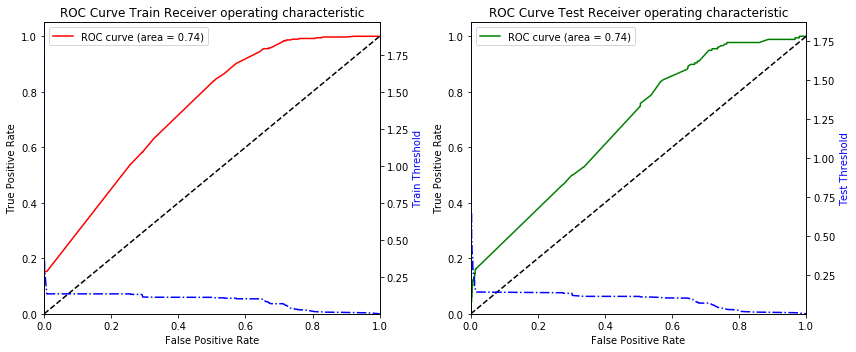

In [62]:
plot_roc_curve(y_train, y_test, training_pred_probs[:, 1], test_pred_probs[:, 1], 'ROC Curve')

In [63]:
def plot_precision_recall(training_labels, test_labels, training_pred_probs, test_pred_probs, title_prefix): 
    train_precision, train_recall, _ = precision_recall_curve(training_labels, training_pred_probs)
    test_precision, test_recall, _ = precision_recall_curve(test_labels, test_pred_probs)
    figure = plt.figure()

    figure.set_figheight(5)
    figure.set_figwidth(12)

    figure.add_subplot(1,2, 1)

    plt.plot(train_recall, train_precision, label='Precision Recall curve', color='r')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title_prefix + ' Train Precision Recall Curve')
    plt.legend(loc="lower right")


    figure.add_subplot(1,2, 2)

    plt.plot(test_recall, test_precision, label='Precision Recall curve', color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title_prefix + ' Test Precision Recall Curve')
    plt.legend(loc="lower right")

    figure.tight_layout()

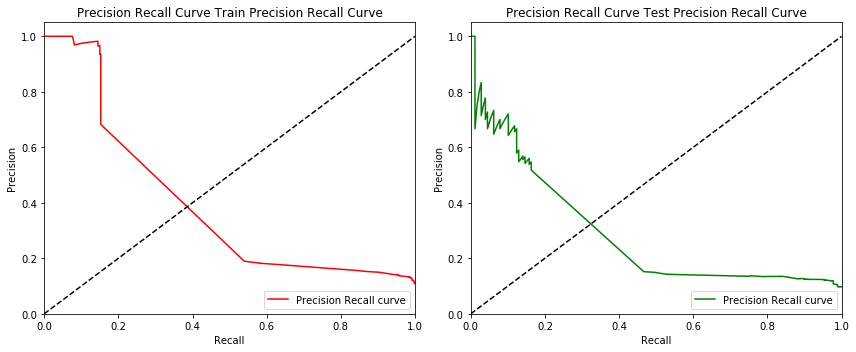

In [65]:
plot_precision_recall(y_train, y_test, training_pred_probs[:, 1], test_pred_probs[:, 1], 'Precision Recall Curve')